In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here
import matplotlib.image as image

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('./data/Data_Entry_2017.csv')
all_xray_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
55227,00013834_004.png,No Finding,4,13834,74,M,PA,2500,2048,0.168,0.168,NaN
69094,00017049_000.png,No Finding,0,17049,41,M,PA,2992,2991,0.143,0.143,NaN
29718,00007734_001.png,Cardiomegaly|Infiltration,1,7734,32,M,AP,2500,2048,0.168,0.168,NaN


In [3]:
## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
2135,00011010_009.png,No Finding,9,11010,031Y,F,AP,2500,2048,0.168,0.168
4248,00020945_023.png,Infiltration,23,20945,034Y,M,AP,3056,2544,0.139,0.139
1719,00009012_008.png,Infiltration,8,9012,054Y,F,PA,2870,2817,0.143,0.143


# Exploratory Data Analysis

In [4]:
all_xray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
dtypes: float64(3), int64(5), object(4)
memory usage: 10.3+ MB


In [5]:
all_xray_df.shape

(112120, 12)

## Age Distribution of Patients

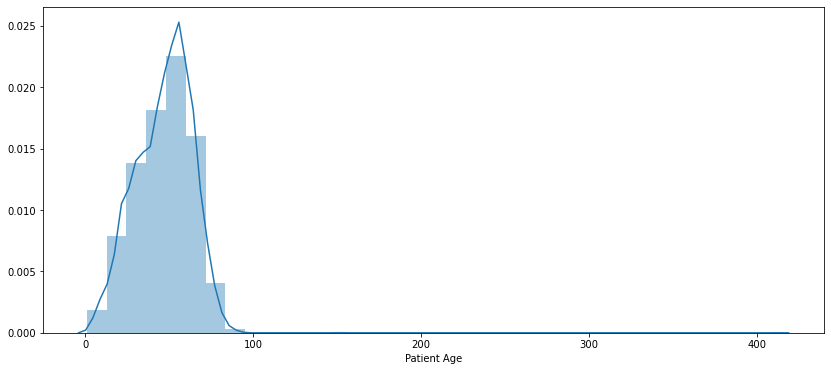

In [6]:
fig, ax= plt.subplots(figsize= (14,6))
sns.distplot(all_xray_df['Patient Age'], hist= True, kde= True, ax= ax, bins=35);

In [7]:
all_xray_df['Patient Age'].describe()

count    112120.000000
mean         46.901463
std          16.839923
min           1.000000
25%          35.000000
50%          49.000000
75%          59.000000
max         414.000000
Name: Patient Age, dtype: float64

*This look like age of patients ranges from `1 to 414`, this seems a bit unusual because a person with age 414 years is not possible. The oldest person ever whose age has been independently verified is `Jeanne Calment (1875–1997) of France`, who lived to the age of `122 years, 164 days`.*

**Lets look at the records where the age is above 100.**

In [8]:
all_xray_df[all_xray_df['Patient Age']> 100]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
20852,00005567_000.png,Effusion|Pneumonia,0,5567,412,M,AP,3056,2544,0.139,0.139,NaN
46965,00011973_002.png,Edema,2,11973,414,M,AP,3056,2544,0.139,0.139,NaN
48284,00012238_010.png,No Finding,10,12238,148,M,PA,2992,2991,0.143,0.143,NaN
55742,00013950_000.png,No Finding,0,13950,148,M,PA,2964,2939,0.143,0.143,NaN
58650,00014520_026.png,Infiltration|Mass,26,14520,150,M,PA,2992,2991,0.143,0.143,NaN
62929,00015558_000.png,No Finding,0,15558,149,M,PA,2992,2991,0.143,0.143,NaN
74884,00018366_044.png,Pneumothorax,44,18366,152,F,PA,2302,2991,0.143,0.143,NaN
78795,00019346_000.png,Infiltration,0,19346,151,F,PA,2678,2774,0.143,0.143,NaN
84810,00020900_002.png,No Finding,2,20900,411,M,AP,3056,2544,0.139,0.139,NaN
85404,00021047_002.png,Mass|Pleural_Thickening,2,21047,412,M,AP,3056,2544,0.139,0.139,NaN


In [9]:
all_xray_df[all_xray_df['Patient Age']> 100].shape

(16, 12)

*There was some issue with data collection process all these ages of a person is not possible. These migth be noted in terms on days or months. And we cannot come to conclusion before talking to the hospital from where we got dicon data.*

## Patient Gender

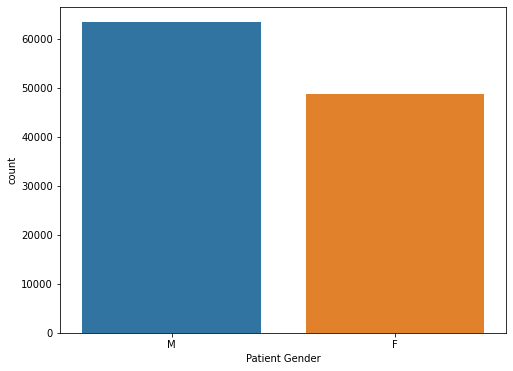

In [10]:
fig, ax= plt.subplots(figsize= (8,6))
sns.countplot('Patient Gender', data= all_xray_df, ax=ax)

In [11]:
all_xray_df['Patient Gender'].value_counts()

M    63340
F    48780
Name: Patient Gender, dtype: int64

In [12]:
all_xray_df['Patient Gender'].value_counts(normalize= True)

M    0.56493
F    0.43507
Name: Patient Gender, dtype: float64

*From the collected x-rays data, `56% were female and 44% were male.`*

## View Position

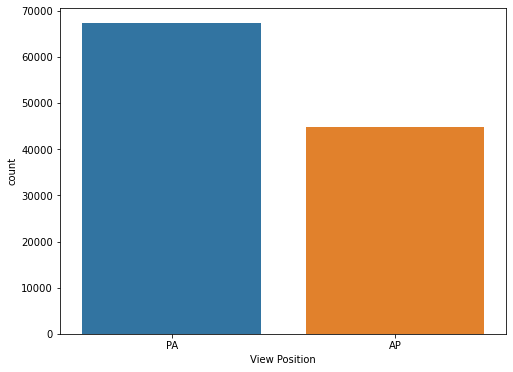

In [13]:
fig, ax= plt.subplots(figsize= (8,6))
sns.countplot('View Position', data= all_xray_df, ax=ax);

In [14]:
all_xray_df['View Position'].value_counts()

PA    67310
AP    44810
Name: View Position, dtype: int64

In [15]:
all_xray_df['View Position'].value_counts(normalize= True)

PA    0.600339
AP    0.399661
Name: View Position, dtype: float64

> *In a posteroanterior (PA) view, the x-ray source is positioned so that the x-ray beam enters through the posterior (back) aspect of the chest and exits out of the anterior (front) aspect.* 

> *In anteroposterior (AP) views, the positions of the x-ray source and detector are reversed: the x-ray beam enters through the anterior aspect and exits through the posterior aspect of the chest.*

*Almost 60% of X-rays have posteroanterior(PA) view and 40% have anteroposterior (AP) view.*

*AP chest x-rays are harder to read than PA x-rays and are therefore generally reserved for situations where it is difficult for the patient to get an ordinary chest x-ray, such as when the patient is bedridden.*

## Findings Labels

In [16]:
# Spliting the Diseases and coverting into a list
diseases= list(all_xray_df['Finding Labels'].str.split('|'))
# Converting a list of lists to a list
diseases= [item for sublist in diseases for item in sublist]
# Getting the unique diseases
unique_disease= list(set(diseases))
print("Total No Unique Diseases: ", len(unique_disease))
print(unique_disease)

Total No Unique Diseases:  15
['Emphysema', 'Infiltration', 'Consolidation', 'Nodule', 'Fibrosis', 'Hernia', 'Effusion', 'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Edema', 'Cardiomegaly', 'Mass', 'Atelectasis', 'No Finding']


In [17]:
for disease in unique_disease:
    all_xray_df[disease]= all_xray_df['Finding Labels'].str.contains(disease).map({True: 1, False: 0})

In [18]:
all_xray_df[unique_disease].head(10)

,Emphysema,Infiltration,Consolidation,Nodule,Fibrosis,Hernia,Effusion,Pneumothorax,Pleural_Thickening,Pneumonia,Edema,Cardiomegaly,Mass,Atelectasis,No Finding
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


**Lets check how many people have Pneumonia**

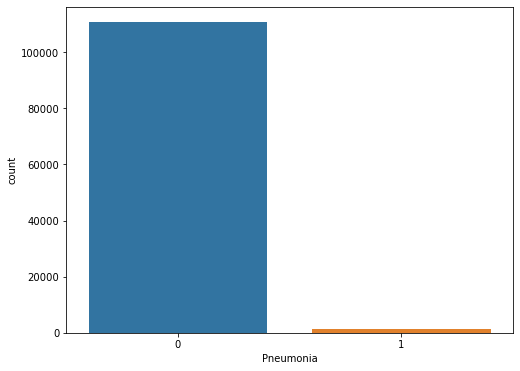

In [19]:
fig, ax= plt.subplots(figsize= (8,6))
sns.countplot('Pneumonia', data= all_xray_df, ax=ax);

In [20]:
all_xray_df['Pneumonia'].value_counts()

0    110689
1      1431
Name: Pneumonia, dtype: int64

In [21]:
all_xray_df['Pneumonia'].value_counts(normalize= True)

0    0.987237
1    0.012763
Name: Pneumonia, dtype: float64

> *`Only 1.2% of the all the X-rays have Pneumonia.`*

**X-Rays with no Findings**

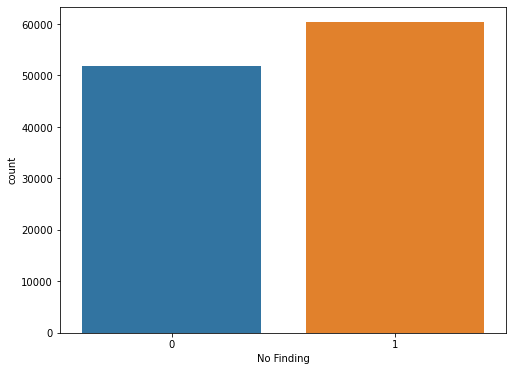

In [22]:
fig, ax= plt.subplots(figsize= (8,6))
sns.countplot('No Finding', data= all_xray_df, ax=ax);

In [23]:
all_xray_df['No Finding'].value_counts()

1    60361
0    51759
Name: No Finding, dtype: int64

In [24]:
all_xray_df['No Finding'].value_counts(normalize= True)

1    0.538361
0    0.461639
Name: No Finding, dtype: float64

> *`Almost 54% of the all X-Rays have no findings from the x-rays`*

## Diseases that are comorbid with pneumonia

In [6]:
disease_columns= ['Pleural_Thickening', 'Cardiomegaly', 'Hernia', 'Emphysema', 'Pneumonia', 'Atelectasis', 'Fibrosis', 'Edema', 'Consolidation', 'Pneumothorax', 'Infiltration', 'Effusion', 'Mass', 'Nodule']

In [26]:
# Compute the correlation matrix
corr = all_xray_df[disease_columns].corr()
corr

,Pleural_Thickening,Cardiomegaly,Hernia,Emphysema,Pneumonia,Atelectasis,Fibrosis,Edema,Consolidation,Pneumothorax,Infiltration,Effusion,Mass,Nodule
Pleural_Thickening,1.000000,0.009121,0.001330,0.026408,0.002227,0.025202,0.053578,-0.002032,0.028733,0.031661,0.020381,0.072009,0.065388,0.049649
Cardiomegaly,0.009121,1.000000,0.001762,-0.007090,0.002848,0.015819,0.004837,0.028318,0.015360,-0.022248,0.014189,0.130094,-0.010682,-0.012123
Hernia,0.001330,0.001762,1.000000,-0.001466,0.000182,0.010830,0.007478,-0.002326,-0.005413,-0.001621,-0.003780,-0.003656,0.011927,-0.002422
Emphysema,0.026408,-0.007090,-0.001466,1.000000,-0.004888,0.032599,-0.000908,-0.009204,-0.000521,0.178175,0.000406,0.011198,0.023213,-0.007062
Pneumonia,0.002227,0.002848,0.000182,-0.004888,1.000000,0.029911,-0.006867,0.173996,0.025235,-0.009984,0.073020,0.024322,-0.001005,-0.003719
Atelectasis,0.025202,0.015819,0.010830,0.032599,0.029911,1.000000,0.011130,-0.003397,0.108943,0.031422,0.093131,0.172445,0.018953,-0.007967
Fibrosis,0.053578,0.004837,0.007478,-0.000908,-0.006867,0.011130,1.000000,-0.013243,0.003236,0.000094,0.008794,-0.002776,0.009959,0.022478
Edema,-0.002032,0.028318,-0.002326,-0.009204,0.173996,-0.003397,-0.013243,1.000000,0.020822,-0.022487,0.094208,0.062092,0.002910,0.000261
Consolidation,0.028733,0.015360,-0.005413,-0.000521,0.025235,0.108943,0.003236,0.020822,1.000000,0.000485,0.045926,0.101130,0.074573,0.031819
Pneumothorax,0.031661,-0.022248,-0.001621,0.178175,-0.009984,0.031422,0.000094,-0.022487,0.000485,1.000000,0.000576,0.047571,0.029940,0.007576


In [27]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

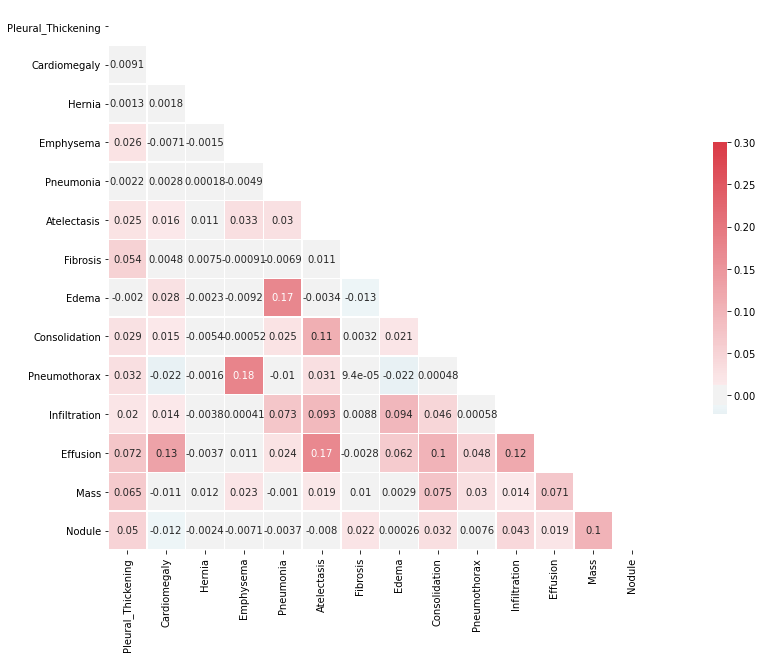

In [28]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,annot=True, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

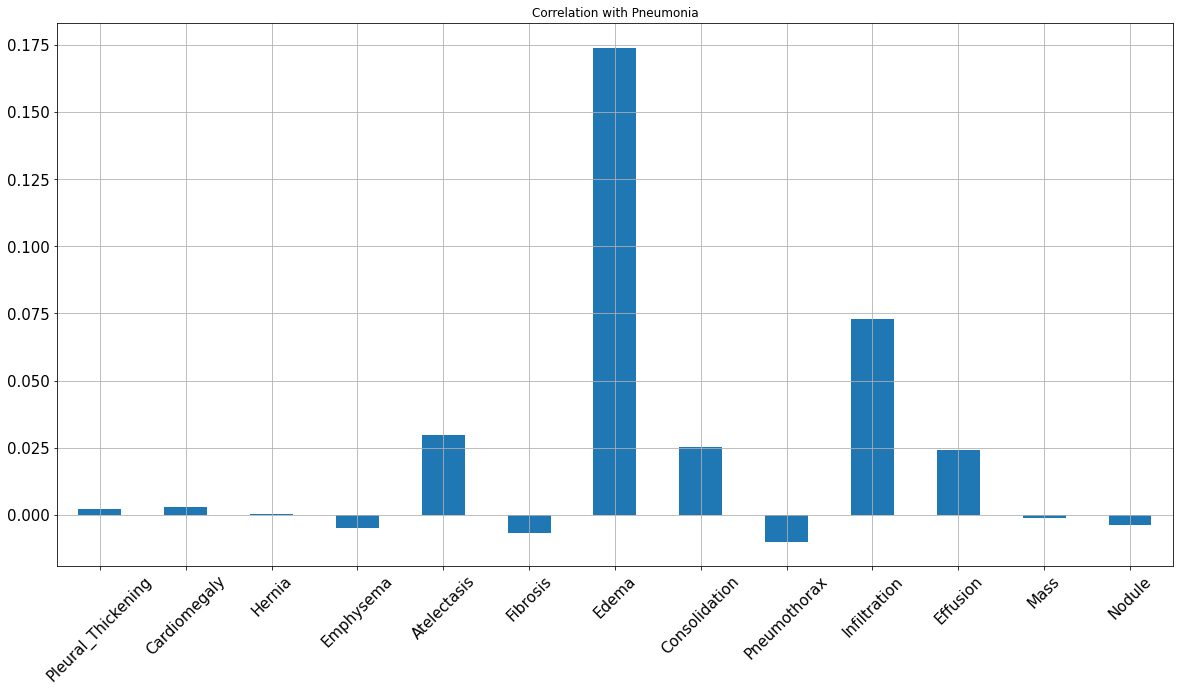

In [29]:
other_disease= ['Pleural_Thickening', 'Cardiomegaly', 'Hernia', 'Emphysema', 'Atelectasis', 'Fibrosis', 'Edema', 'Consolidation', 'Pneumothorax', 'Infiltration', 'Effusion', 'Mass', 'Nodule']
all_xray_df[other_disease].corrwith(all_xray_df['Pneumonia']).plot.bar(figsize=(20,10),
                  title = 'Correlation with Pneumonia',
                  fontsize = 15, rot = 45,
                  grid = True)

> *`We can see that Pneumonia has some corelation with Edema and Infiltration.`*

**As there are binary categorical variable Corelation can't be good measure to check.**

In [30]:
# https://pandas.pydata.org/pandas-docs/stable/style.html
def highlight_min(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_max = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)

In [31]:
# Since technically a crosstab between all 6 classes is impossible to vizualize, lets take a 
# look at toxic with other tags
main_col="Pneumonia"
corr_mats=[]
for other_col in all_xray_df[other_disease].columns:
    confusion_matrix = pd.crosstab(all_xray_df[main_col], all_xray_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=all_xray_df[other_disease].columns)

#cell highlighting
out = out.style.apply(highlight_min,axis=0)
out

**What we need is something that will look like correlation, but will work with categorical values — or more formally, we’re looking for a measure of association between two categorical features.**

Cramér’s V. It is based on a nominal variation of Pearson’s Chi-Square Test

In [32]:
import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [33]:
for disease in other_disease:
    print(f"cramers_v({disease}, Pneumonia):", cramers_v(all_xray_df[disease], all_xray_df['Pneumonia']))

cramers_v(Pleural_Thickening, Pneumonia): 0.0
cramers_v(Cardiomegaly, Pneumonia): 0.0
cramers_v(Hernia, Pneumonia): 0.0
cramers_v(Emphysema, Pneumonia): 0.003525024969553786
cramers_v(Atelectasis, Pneumonia): 0.02963045512935709
cramers_v(Fibrosis, Pneumonia): 0.0058193383136336445
cramers_v(Edema, Pneumonia): 0.17369126520467795
cramers_v(Consolidation, Pneumonia): 0.02485776139387798
cramers_v(Pneumothorax, Pneumonia): 0.00933027150102715
cramers_v(Infiltration, Pneumonia): 0.0728552762748404
cramers_v(Effusion, Pneumonia): 0.02401467124588906
cramers_v(Mass, Pneumonia): 0.0
cramers_v(Nodule, Pneumonia): 0.0019131877644612545


> *`From this is evident that Edema has some corelation with Pneumonia.`*

**Gender comaprison for people with Pneumonia and Non-Pneumonia**

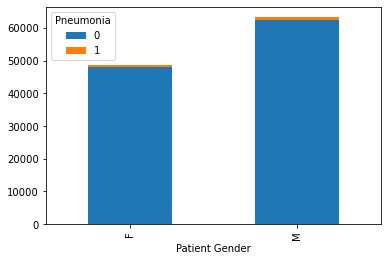

In [34]:
pd.crosstab(all_xray_df['Patient Gender'], all_xray_df['Pneumonia']).plot(kind= 'bar', stacked = True)

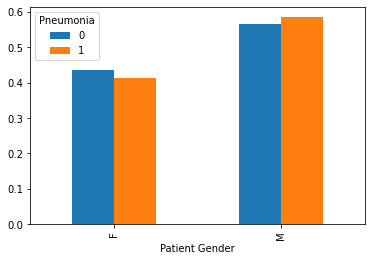

In [35]:
pd.crosstab(all_xray_df['Patient Gender'], all_xray_df['Pneumonia'], normalize='columns').plot(kind= 'bar')

In [36]:
pd.crosstab(all_xray_df['Patient Gender'], all_xray_df['Pneumonia'], normalize='columns')

Pneumonia,0,1
Patient Gender,,
F,0.435337,0.414396
M,0.564663,0.585604


> *`Out of all paitents who have pneumonia, 59% are male and 41% female.`*

**Age Comparisons of people with pneumonia and non-pneumonia**

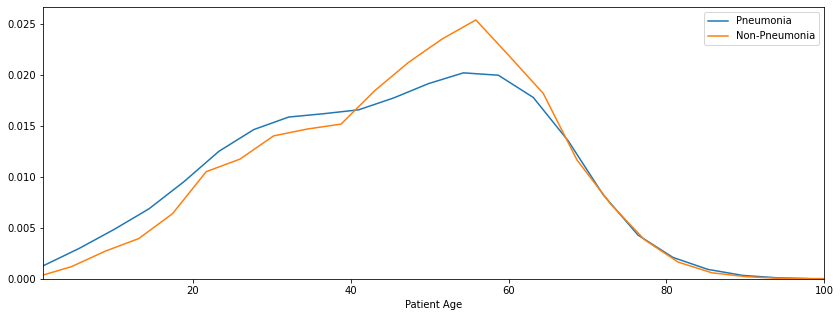

In [37]:
plt.figure(figsize=(14, 5))
sns.distplot(all_xray_df[all_xray_df['Pneumonia'] == 1]['Patient Age'],hist=False, label= 'Pneumonia')
sns.distplot(all_xray_df[all_xray_df['Pneumonia'] == 0]['Patient Age'],hist= False, label= 'Non-Pneumonia');
plt.xlim(left= 1, right= 100);

## Pixel Level Assesments

In [38]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Image Index                  5606 non-null   object 
 1   Finding Labels               5606 non-null   object 
 2   Follow-up #                  5606 non-null   int64  
 3   Patient ID                   5606 non-null   int64  
 4   Patient Age                  5606 non-null   object 
 5   Patient Gender               5606 non-null   object 
 6   View Position                5606 non-null   object 
 7   OriginalImageWidth           5606 non-null   int64  
 8   OriginalImageHeight          5606 non-null   int64  
 9   OriginalImagePixelSpacing_x  5606 non-null   float64
 10  OriginalImagePixelSpacing_y  5606 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 481.9+ KB


In [39]:
sample_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


In [40]:
# Get all image path and store it in a dictionary
import os
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/data','images*', '*', '*.png'))}

In [41]:
from tqdm import tqdm
tqdm.pandas()
sample_df['pixel_data']= sample_df['Image Index'].progress_apply(lambda x: image.imread(all_image_paths[x]))

/opt/conda/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 5606/5606 [05:57<00:00, 15.66it/s]


In [42]:
for disease in unique_disease:
    sample_df[disease]= sample_df['Finding Labels'].str.contains(disease).map({True: 1, False: 0})

In [43]:
sample_df[unique_disease].head(5)

,Emphysema,Infiltration,Consolidation,Nodule,Fibrosis,Hernia,Effusion,Pneumothorax,Pleural_Thickening,Pneumonia,Edema,Cardiomegaly,Mass,Atelectasis,No Finding
0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0


In [44]:
def show_image_distr(img_data):
    f = plt.figure()
    f.set_figwidth(10)

    s1 = f.add_subplot(1, 2, 1)
    s1.set_title('Image')
    plt.imshow(img_data, cmap='gray')


    s2 = f.add_subplot(1, 2, 2)
    s2.set_title('Intensity Distribution')
    plt.hist(img_data.ravel(), bins = 256)

    plt.show()

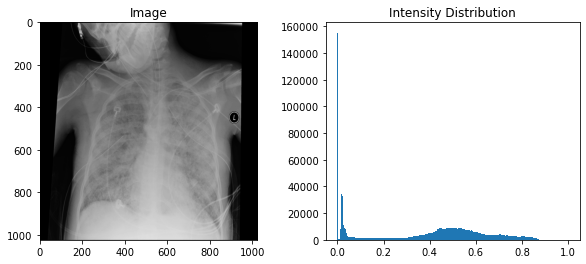

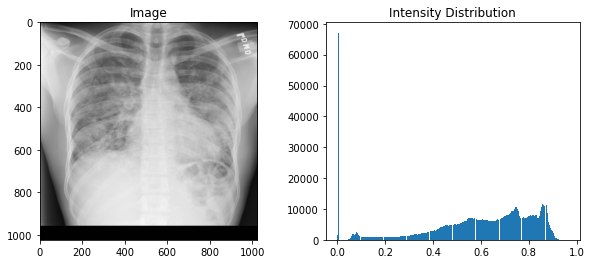

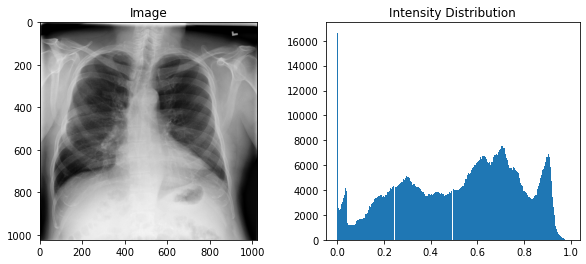

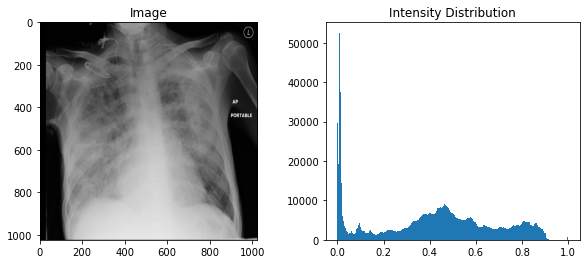

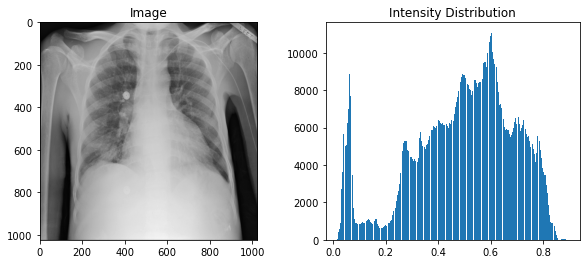

In [45]:
for i in range(5):
    img_data= sample_df[sample_df['Pneumonia'] == 1]['pixel_data'].sample(1).values[0]
    show_image_distr(img_data)

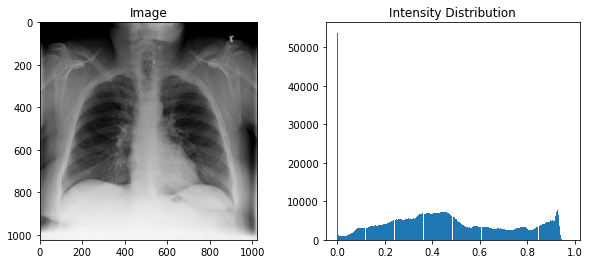

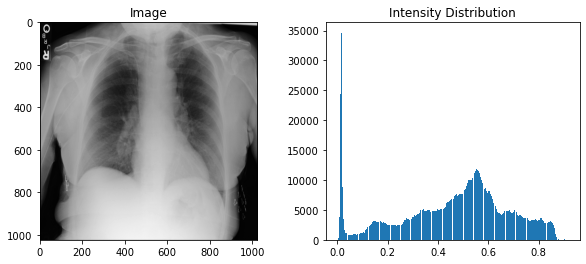

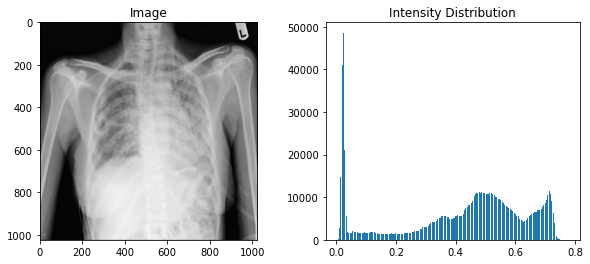

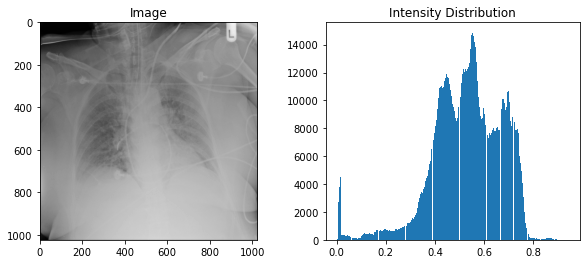

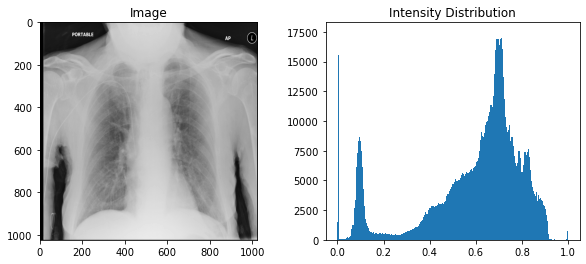

In [46]:
for i in range(5):
    img_data= sample_df[sample_df['Pneumonia'] == 0]['pixel_data'].sample(1).values[0]
    show_image_distr(img_data)

*Lets compare the distribution of the pneumonia vs non-pneumonia.*

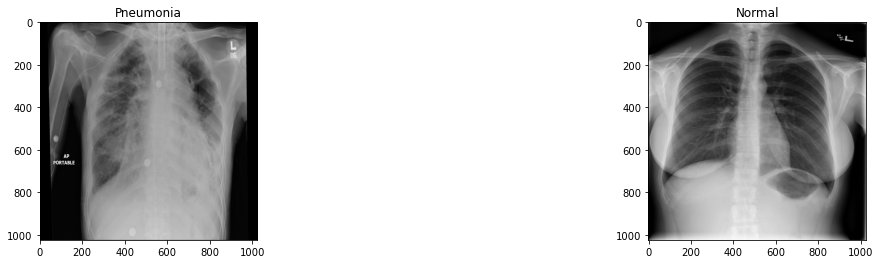

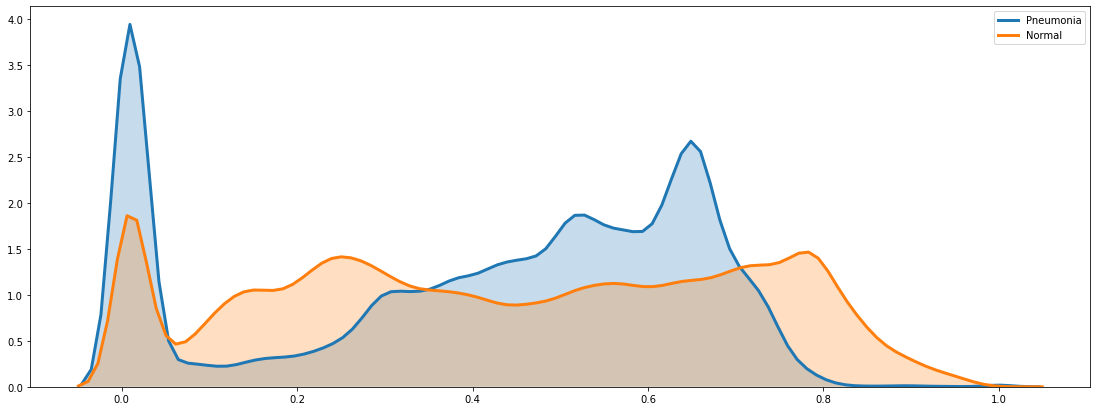

In [47]:
sample_positive_data= sample_df[sample_df['Pneumonia'] == 1]['pixel_data'].sample(1).values[0]
sample_negative_data= sample_df[sample_df['Pneumonia'] == 0]['pixel_data'].sample(1).values[0]

f = plt.figure()
f.set_figwidth(20)

s1 = f.add_subplot(1, 2, 1)
s1.set_title('Pneumonia')
plt.imshow(sample_positive_data, cmap='gray')


s2 = f.add_subplot(1, 2, 2)
s2.set_title('Normal')
plt.imshow(sample_negative_data, cmap='gray')

plt.show()

plt.figure(figsize= (19, 7))
sns.distplot(sample_positive_data.ravel(), hist = False, kde = True, 
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                 label= 'Pneumonia')
sns.distplot(sample_negative_data.ravel(), hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                 label= 'Normal');

> `Not much we can differentiate using these pixel intensity values but for most of the Pneumonia cases the density plots are quite denser around 200 to 250.`

## intensity distributions of images with different disease labels

In [4]:
def show_image_distr(img_data,title):
    f = plt.figure()
    f.set_figwidth(10)

    s1 = f.add_subplot(1, 2, 1)
    s1.set_title(title)
    plt.imshow(img_data, cmap='gray')


    s2 = f.add_subplot(1, 2, 2)
    s2.set_title("Intensity Distribution, means: {:.2f} std: {:.2f}".format(img_data.ravel().mean(),img_data.ravel().std()))
    plt.hist(img_data.ravel(), bins = 256)

    plt.show()

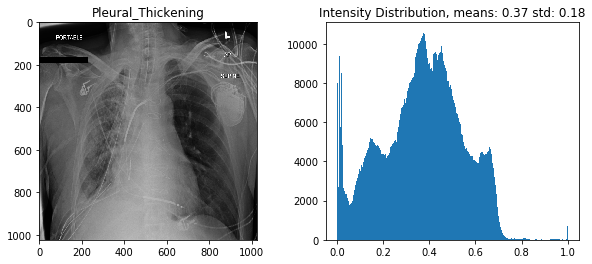

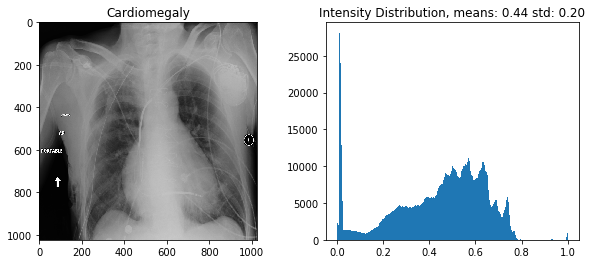

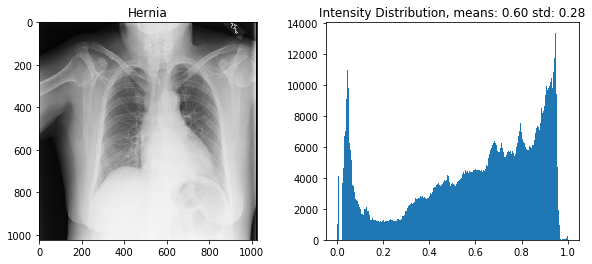

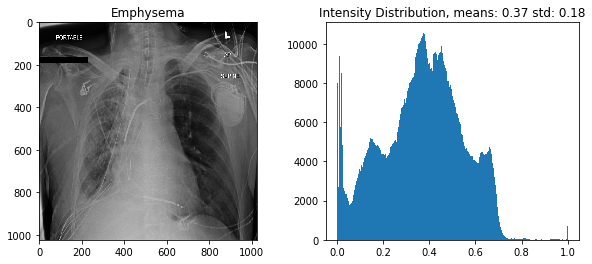

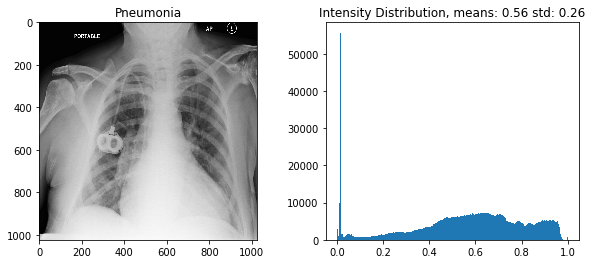

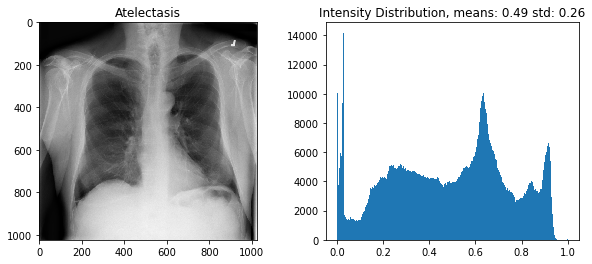

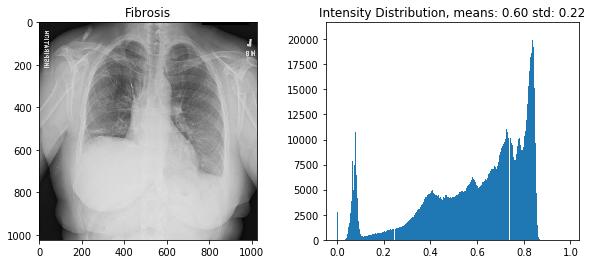

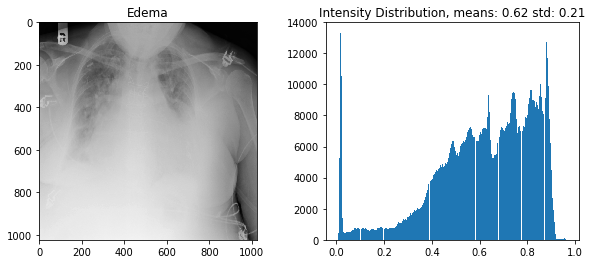

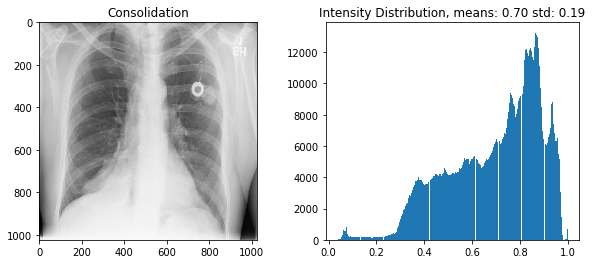

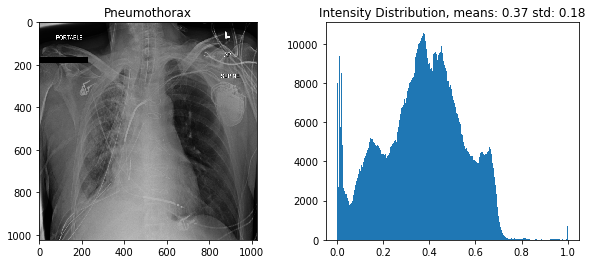

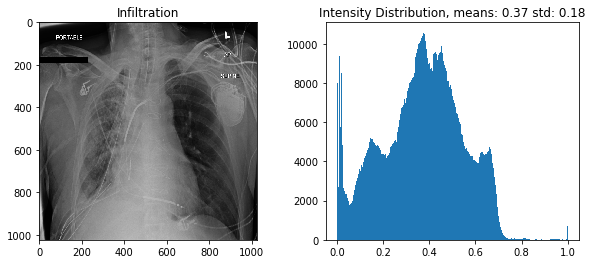

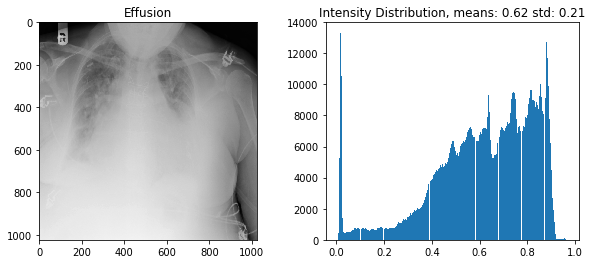

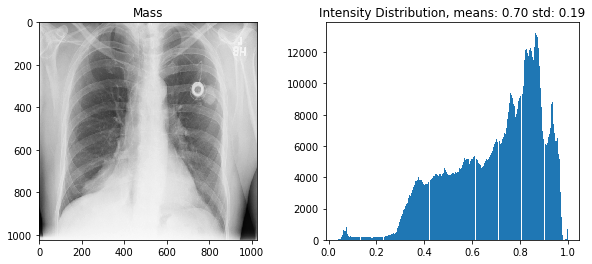

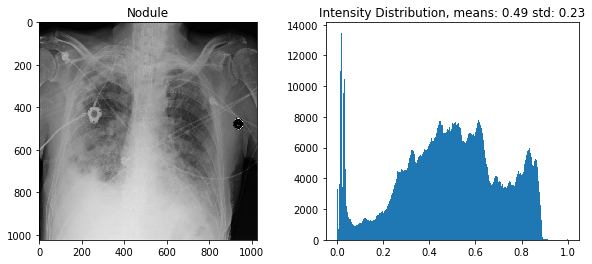

In [7]:
from pathlib import Path
for disease in disease_columns:
    val = sample_df[sample_df["Finding Labels"].str.contains(disease)].iloc[0]["Image Index"]
    for path in Path('./data').rglob(val):
        img = image.imread(str(path))
        show_image_distr(img,disease)

> `Just by analysing the std and the mean of various can provided information of the type of disease`